In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv(r"D:\data science tasks\data_sets\bloodpress.csv")
df.shape

(20, 8)

In [2]:
type(df)
list(df)


['Pt', 'BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']

In [3]:
#df=df.drop(columns=['Weight','Stress','Age'])

In [4]:
X=df[['Weight']]
X.shape
list(X)

['Weight']

In [7]:
Y=df.iloc[:,1]


In [6]:
#import matplotlib.pyplot as plt
df.plot.scatter(x='Age',y='BP')

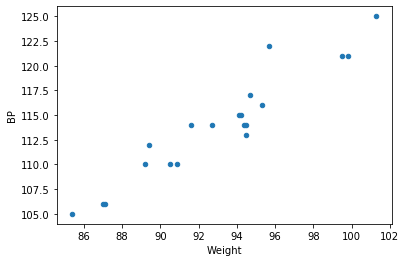

In [111]:
df.plot.scatter(x='Weight',y='BP')

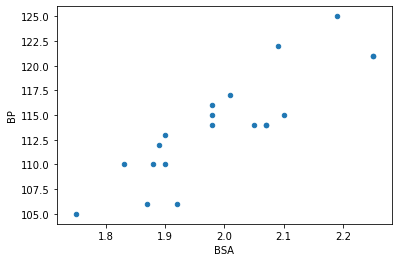

In [112]:
df.plot.scatter(x='BSA',y='BP')

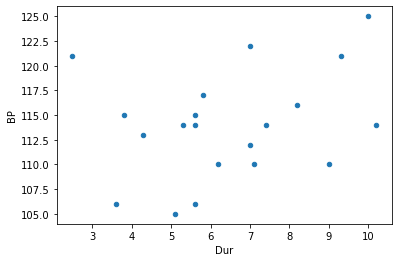

In [113]:
df.plot.scatter(x='Dur',y='BP')

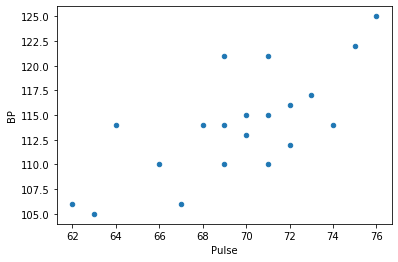

In [114]:
df.plot.scatter(x='Pulse',y='BP')

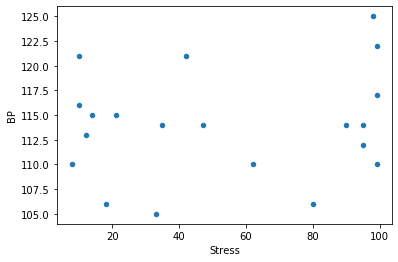

In [115]:
df.plot.scatter(x='Stress',y='BP')

In [118]:
df[[ 'BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']].corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrm = lr.fit(X,Y)

In [9]:
lrm.intercept_

2.2053053258691904

In [10]:
lrm.coef_

array([1.2009313])

In [11]:
Y_pre=lrm.predict(X)
print(f'predected = {Y_pre.round(3)}')

predected = [104.765 115.333 116.654 115.933 109.569 121.698 122.058 111.37  109.328
 113.532 115.573 115.213 112.211 106.806 123.86  115.693 106.686 115.693
 110.89  117.134]


In [260]:
Y_error=Y-Y_pre
print(Y_error)

0     0.235162
1    -0.333034
2    -0.654058
3     1.066501
4     2.431436
5    -0.697970
6    -1.058249
7    -1.369960
8     0.671623
9     0.468363
10   -1.573220
11   -0.212941
12    1.789388
13   -0.806422
14    1.140354
15   -1.693313
16   -0.686328
17   -2.693313
18   -0.889588
19    4.865569
Name: BP, dtype: float64


In [12]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y,Y_pre)
r2=r2_score(Y,Y_pre)
print(f'r2 score={r2} mean square error={mse}')

r2 score=0.902628542814589 mean square error=2.726400801191507


In [15]:
import statsmodels.api as sma
X1 = sma.add_constant(X) ## let's add an intercept (beta_0) to our model

#  Linear regression can be run by using sm.OLS:
# import statsmodels.formula.api as sm
lm2 = sma.OLS(Y,X1).fit()
lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.53e-10
Time:                        16:34:44   Log-Likelihood:                -38.409
No. Observations:                  20   AIC:                             80.82
Df Residuals:                      18   BIC:                             82.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2053      8.663      0.255      0.802     -15.996      20.406
Weight         1.2009      0.093     12.917      0.000       1.006       1.396
==============================================================================
Omnibus:                        9.231   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.566
Skew:                           1.157   Prob(JB):                       0.0375
Kurtosis:                       4.590   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# RSS = np.sum((Y_pre - Y)**2) # Residual sum of squares
# print("Residual Sum of squares : ",RSS.round(3))

# y_mean = np.mean(Y)
# TSS = np.sum((Y - y_mean)**2)
# R2 = 1 - RSS/TSS
# print("R Square : ",R2.round(4))

# n=X.shape[0]
# p=X.shape[1] - 1

# adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
# print("Adjusted R-squared : ",adj_rsquared.round(4))

Residual Sum of squares :  2.156
R Square :  0.9962
Adjusted R-squared :  0.9948
